-------------------------
{0: array([[314.20825, 209.96306]], dtype=float32), 1: array([[135.96571, 215.73767]], dtype=float32)}
0 timestep


/home/bharat/Documents/Simulations/multi_agent_learning/.venv/lib/python3.8/site-packages/gymnasium/spaces/box.py:130: UserWarning: WARN: Box bound precision lowered by casting to float32
  gym.logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


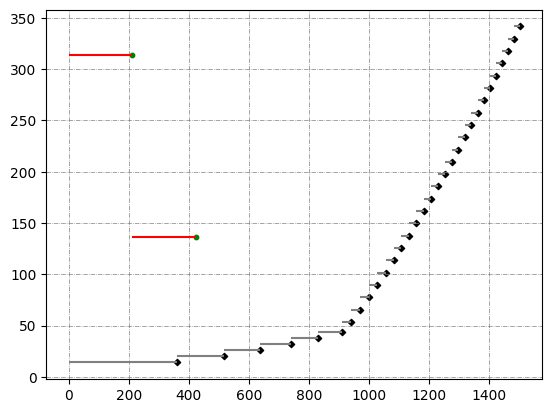

{0: -16373.519111691392, 1: -16823.839885356836} reward
{0: array([[288.68558, 163.71086]], dtype=float32)}
1 timestep


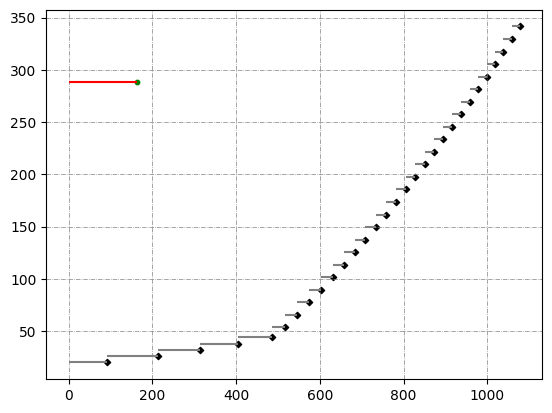

{0: -25758.72344203177} reward


In [1]:
from auction_env import AuctionEnv

env = AuctionEnv(render_mode = "human")

episodes = 1

for episode in range(episodes):
    env.reset()
    done = False
    print("-------------------------")
    while True:
        
        actions = {i : env.action_space(0).sample() for i in env.agents}
        print(actions)
        # action = {0:action}
        # print(action,"action")
        print(env.timestep,"timestep")
        _,reward,terminations,_,_ = env.step(actions)
        print(reward,"reward")
        # print(env.requirements,"requirements")
        if all(value == True for value in terminations.values()):
            break
        
            

In [ ]:
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 19.17165986]

In [ ]:
import numpy as np
selected_action_fl = np.array([100,20])
noise = np.random.normal(0,10,(2,))
clip_array_min = [0.5,0]
clip_array_max = [500,50]
selected_action_fl = np.clip(selected_action_fl + noise, clip_array_min,clip_array_max)


In [ ]:
selected_action_fl

In [ ]:
from auction_env import NCpGenco


seller = NCpGenco()

asks = seller.asks()

min_cost = 0
total_qty  = 0
for i in range(len(asks)):
    min_cost += asks[i][0] * asks[i][1]
    total_qty += asks[i][1]
print(min_cost)
print(asks)
print(total_qty)

In [ ]:
(1502 * 341) - 131222.23523673965

In [ ]:
7500000.0 - 131222.23523673965

In [ ]:
1670000 - 131222.23523673965

In [ ]:
import copy
import random
class OUNoise:
    """Ornstein-Uhlenbeck process.
    Taken from Udacity deep-reinforcement-learning github repository:
    https://github.com/udacity/deep-reinforcement-learning/blob/master/
    ddpg-pendulum/ddpg_agent.py
    """

    def __init__(
        self, 
        size: int, 
        mu: float = 0.0, 
        theta: float = 0.15, 
        sigma: float = 0.2,
    ):
        """Initialize parameters and noise process."""
        self.state = np.float64(0.0)
        self.mu = mu * np.ones(size)
        self.theta = theta
        self.sigma = sigma
        self.reset()

    def reset(self):
        """Reset the internal state (= noise) to mean (mu)."""
        self.state = copy.copy(self.mu)

    def sample(self) -> np.ndarray:
        """Update internal state and return it as a noise sample."""
        x = self.state
        dx = self.theta * (self.mu - x) + self.sigma * np.array(
            [random.random() for _ in range(len(x))]
        )
        self.state = x + dx
        return self.state

In [ ]:
# act = np.array([[0, 0]])
ou_noise_theta = 0.15
ou_noise_sigma = 0.5
noise23 = OUNoise(
            2,
            theta=ou_noise_theta,
            sigma=ou_noise_sigma,
        )
env.reset()
VAR = 50
VAR_DECAY = 0.99999
VAR_MIN = 0.1
for i in range(1000):
    act = env.action_space(0).sample()
    # noise = np.tile(noise23.sample(),(1,1))
    noise = np.tile(np.random.normal(0,VAR,(2,)),(1,1))
    print(noise)

    clip_array_min = np.tile([0.5,0],(1,1))
    clip_array_max = np.tile([500,1500],(1,1))
    selected_action = np.clip(act + noise,clip_array_min,clip_array_max)

    print(selected_action)
    print("action")
    VAR = max(VAR_MIN,VAR * VAR_DECAY)
    print(VAR)

In [ ]:
env.observation_space(0).sample()

In [ ]:
import torch
class Actor(nn.Module):
    def __init__(
        self, 
        in_dim: int, 
        out_dim: int,
        init_w: float = 3e-3,
    ):
        """Initialize."""
        super(Actor, self).__init__()
        
        self.hidden1 = nn.Linear(in_dim, 256)
        self.hidden2 = nn.Linear(256, 256)
        self.out = nn.Linear(256, out_dim)
        
        # self.out.weight.data.uniform_(-init_w, init_w)
        # self.out.bias.data.uniform_(-init_w, init_w)

    def forward(self, state: torch.Tensor) -> torch.Tensor:
        """Forward method implementation."""
        x = F.relu(self.hidden1(state))
        x = F.relu(self.hidden2(x))
        action = self.out(x)
        
        return action
    
    
class Critic(nn.Module):
    def __init__(
        self, 
        in_dim: int, 
        init_w: float = 3e-3,
    ):
        """Initialize."""
        super(Critic, self).__init__()
        
        self.hidden1 = nn.Linear(in_dim, 256)
        self.hidden2 = nn.Linear(256, 256)
        self.out = nn.Linear(256, 1)
        
        # self.out.weight.data.uniform_(-init_w, init_w)
        # self.out.bias.data.uniform_(-init_w, init_w)

    def forward(
        self, state: torch.Tensor, action: torch.Tensor
    ) -> torch.Tensor:
        """Forward method implementation."""
        # print((state,action),"state,action")
        x = torch.cat((state, action), dim=-1)
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        value = self.out(x)
        
        return value

In [ ]:
from sklearn import preprocessing
import numpy as np
tariffs = np.array([1.3,1.6,1.8,2.3,2.8])
sum_tf = sum(tariffs)
total_demand = 1000
# own_demand = 280
# own_tariff = 1.3
# C_1 = (own_demand * own_tariff)/(total_demand)
normalized_arr = tariffs/tariffs.sum()
Normalize_dmd = 1/(normalized_arr)
# nomrmalize_2 = (tariffs - np.min(tariffs))/(np.max(tariffs)-np.min(tariffs))
# print(1000 * normalized_arr)
# print(nomrmalize_2)
print(1000*(Normalize_dmd)/(Normalize_dmd.sum()))
# print(C_1)

In [ ]:
import numpy as np
dist=np.random.beta(2,5,10)
print(dist*40)

In [ ]:
from scipy import stats

a, loc, scale = 1, 40, 1
sample = stats.skewnorm(a, loc, scale).rvs(1000)


In [ ]:
import matplotlib.pyplot as plt
pvh = 50
alpha = 4
beta = 4
scaling = 1.05 
pvh = pvh * scaling 
prices = pvh * (beta/ (alpha + beta)) + pvh *  np.random.beta(alpha,beta,10) 

plt.hist(prices)

print(np.mean(prices))

# Mean is pvh here 49.92439589831142 - 5

In [ ]:
import numpy as np
pvh = 50

alpha = 0.1
beta = 0.1

prices = pvh * (beta/ (alpha + beta)) + pvh *  np.random.beta(alpha,beta,1000) 

plt.hist(prices)

print(np.mean(prices))

# Mean is pvh here 49.92439589831142

In [ ]:
import numpy as np
pr = np.ones(10)
qt = np.zeros(10)

for i in zip(pr,qt):
    if i[1] == 0:
        break
print(i[0])
